# Homework 8
### Cody Costa, David Loi

### Problem 1

#### a)

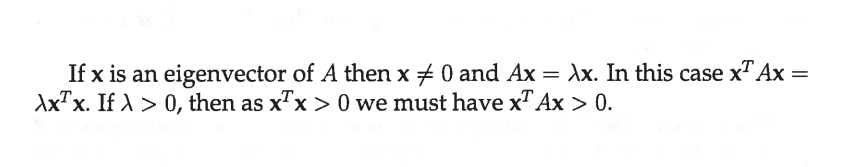

#### b)

## Notebook Assignment

In [35]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

#### Load Data to Analyze

In [36]:
data = pd.read_csv('emnist-digits-test.csv', header=None, sep=',', dtype='uint')
data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Filter data into suggested usable set (sum of each row in the table)

In [37]:
row_sums = np.sum(data, axis=1)
row_sums

0        40376
1        21547
2        35224
3        39065
4        45823
         ...  
39995    30171
39996    30904
39997    37759
39998    23020
39999    32676
Length: 40000, dtype: uint64

#### Compute Mean and Variance

In [38]:
MEAN = np.mean(row_sums)
VARIANCE = np.var(row_sums)

In [39]:
MEAN, VARIANCE

(34698.252, 99515279.57419601)

#### For a Sample Size of 30, Calculate 1000 random reps of the MEAN, and estimate the VARIANCE

In [40]:
sample_size = 30
num_runs = 1000
random_mean_vals = np.zeros(num_runs)
random_variance_vals = np.zeros(num_runs)

for j in range(num_runs):
    sample_set = np.zeros(sample_size)

    for k in range(sample_size):
        sample_set[k] = row_sums[np.random.randint(0, row_sums.shape[0])]

    random_mean_vals[j] = np.mean(sample_set)
    random_variance_vals[j] = np.var(sample_set)

In [41]:
random_mean_vals.shape, random_variance_vals.shape

((1000,), (1000,))

In [42]:
random_mean_vals

array([32826.13333333, 32550.86666667, 33228.43333333, 35357.36666667,
       37314.13333333, 37319.23333333, 33093.73333333, 33921.4       ,
       32631.36666667, 32710.26666667, 35761.06666667, 38876.36666667,
       36826.86666667, 35170.6       , 32216.2       , 36510.23333333,
       35532.26666667, 36090.53333333, 35075.73333333, 36305.4       ,
       34456.7       , 35048.46666667, 36215.63333333, 35071.5       ,
       38048.76666667, 35676.4       , 36652.66666667, 37813.8       ,
       35550.83333333, 36108.86666667, 33141.7       , 35828.2       ,
       36138.66666667, 35279.2       , 33505.46666667, 36928.33333333,
       35594.26666667, 37051.        , 33433.43333333, 31699.1       ,
       36592.66666667, 33919.2       , 35587.33333333, 34242.83333333,
       34281.        , 33796.56666667, 34754.86666667, 34541.06666667,
       31691.63333333, 33468.9       , 32895.33333333, 35374.23333333,
       35176.13333333, 34412.33333333, 33987.1       , 32797.36666667,
      

In [43]:
random_variance_vals

array([1.11721217e+08, 8.01895277e+07, 1.05288580e+08, 9.70986358e+07,
       7.39965356e+07, 1.51032707e+08, 6.37422973e+07, 9.14591730e+07,
       4.97532294e+07, 8.13113471e+07, 1.21741756e+08, 7.67991392e+07,
       8.06986696e+07, 5.54948554e+07, 8.34549753e+07, 1.17150790e+08,
       1.01286123e+08, 8.50600624e+07, 1.05169284e+08, 1.05244481e+08,
       9.42798168e+07, 8.77827113e+07, 8.12903948e+07, 1.17911617e+08,
       1.17004380e+08, 8.35686378e+07, 8.07015025e+07, 1.38375824e+08,
       1.53722367e+08, 1.01333072e+08, 1.06859983e+08, 7.83375689e+07,
       1.10732081e+08, 1.16230437e+08, 8.65514276e+07, 8.73254657e+07,
       6.82022379e+07, 8.81816907e+07, 1.01079477e+08, 1.00276732e+08,
       9.25508693e+07, 1.44827790e+08, 6.44451137e+07, 6.90886175e+07,
       1.45079828e+08, 1.00876677e+08, 7.31895484e+07, 1.07894799e+08,
       1.03173811e+08, 6.98905392e+07, 8.16839029e+07, 8.02601860e+07,
       9.65382204e+07, 1.48948128e+08, 7.47543983e+07, 7.51580886e+07,
      

In [44]:
np.mean(random_variance_vals)

95725193.77731112

#### Compute Error Between Global and Sample Variance

In [45]:
var_err = 100 * abs(VARIANCE - np.mean(random_variance_vals)) / VARIANCE
print(f'{np.round(var_err, 2)} % error')

3.81 % error


#### Compare Interval Estimate of the Sample Mean